## Двумерный гауссовский вектор

Рассмотрим двумерный гауссовский вектор с ковариационной матрицей $B$

In [53]:
import numpy as np
import scipy.stats as scp
B = np.array([[40, -26], [-26, 25]])

Чтобы смоделировать выборку, найдем разложение матрицы $B$ в виде $B=AA^T$. Численно, это можно следать несколькими способами.
1. Разложение Холецкого

In [4]:
A = np.linalg.cholesky(B)
A@A.T

array([[ 40., -26.],
       [-26.,  25.]])

2. Через SVD разложение:

In [5]:
v, d, w = np.linalg.svd(B)
A = v @ np.diag(np.sqrt(d))
A@A.T

array([[ 40., -26.],
       [-26.,  25.]])

Теперь можно моделировать выборку с ковариационной матрицей B через выборку из независимых N(0,1) величин:

In [6]:
samples = A @ np.random.randn(2, 1000000)

Построим 2D гистограмму полученной выборки. Справа для сравнения теоретическая плотность

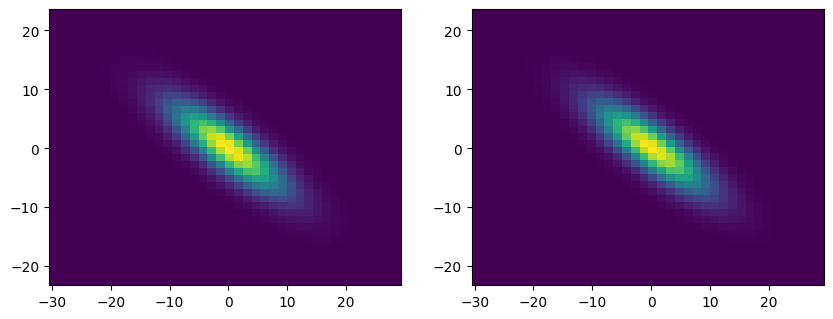

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

fig, ax = plt.subplots(1, 2, figsize=(10, 7))

h, x, y, _ = ax[0].hist2d(*samples, bins=40)
ax[0].set_aspect('equal')

grid = np.stack(np.meshgrid((x[1:] + x[:-1])/2, (y[1:] + y[:-1])/2))
pdf = multivariate_normal.pdf(grid.reshape(2, -1).T, cov=B).reshape(h.shape)

ax[1].imshow(pdf, origin='lower', extent=(x.min(), x.max(), y.min(), y.max()))
ax[1].set_aspect('equal')

plt.show()

**Домашнее задание 1**: изобразить на рисунке с плотностью (теоретической или 2D гистограммы) эллипсы, содержащие 50%, 90%, 95% и 99% плотности вероятности гауссовского вектора с ковариационной матрицей B. Для  эллипса, охватывающего 99% плотности, изобразить полуоси. Результат должен быть как на рисунке ниже:

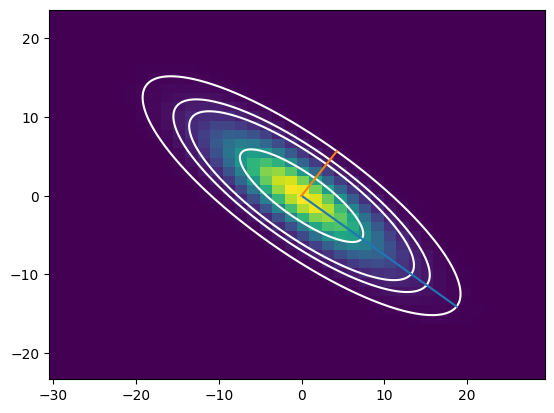

In [79]:
from scipy.stats import chi2
#считаем размер доверительного интервала для определенного параметра
k_1 = chi2.ppf(0.5,df = 2)
k_2 = chi2.ppf(0.9,df = 2)
k_3 = chi2.ppf(0.95,df = 2)
k_4 = chi2.ppf(0.99,df = 2)
#умножаем матрицу ковариации B на размер доверительного интервала
B_1 = B*k_1
B_2 = B*k_2
B_3 = B*k_3
B_4 = B*k_4
#считаем собственные значения, собственные вектора получившихся матриц
eigenvalues_1, eigenvectors_1 = np.linalg.eig(B_1)
eigenvalues_2, eigenvectors_2 = np.linalg.eig(B_2)
eigenvalues_3, eigenvectors_3 = np.linalg.eig(B_3)
eigenvalues_4, eigenvectors_4 = np.linalg.eig(B_4)
#задаем единичный круг
t = np.linspace(0, 2*np.pi, 1000)
circle = np.array([np.cos(t),np.sin(t)])
#задаем множества точек эллипсов:
#np.linalg.eig возвращает нормированные собственные вектора
#берем корни из модулей собственных значений, умножаем на собственные нормированные вектора,
#получаем вектора полуосей, затем их домножаем на circle, и получаем эллипс, заданный параметрически(параметр t)
ellipse_1 = np.dot(np.dot(eigenvectors_1,np.diag(np.sqrt(np.abs(eigenvalues_1)))),circle)
ellipse_2 = np.dot(np.dot(eigenvectors_2,np.diag(np.sqrt(np.abs(eigenvalues_2)))),circle)
ellipse_3 = np.dot(np.dot(eigenvectors_3,np.diag(np.sqrt(np.abs(eigenvalues_3)))),circle)
ellipse_4 = np.dot(np.dot(eigenvectors_4,np.diag(np.sqrt(np.abs(eigenvalues_4)))),circle)

#рисуем распределение из начала семинара
h, x, y, _ = plt.hist2d(*samples, bins=40)
#рисуем эллипсы
plt.plot(ellipse_1[0,:],ellipse_1[1,:], color = 'white')
plt.plot(ellipse_2[0,:],ellipse_2[1,:], color = 'white')
plt.plot(ellipse_3[0,:],ellipse_3[1,:], color = 'white')
plt.plot(ellipse_4[0,:],ellipse_4[1,:], color = 'white')
#рисуем полуоси для эллипса, соответсвующего 99%. Для этого просто нужно взять
vectors_4 = np.dot(eigenvectors_4,np.diag(np.sqrt(np.abs(eigenvalues_4))))
plt.plot([0,vectors_4[0][0]],[0,vectors_4[1][0]])
plt.plot([0,vectors_4[0][1]],[0,vectors_4[1][1]])
plt.show()

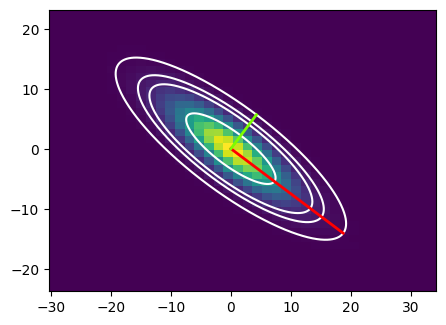

## Моделирование случайного поля

Типичный пример, где могут быть нужны случайные поля - хотим смоделировать 100 реализаций некоторого процесса (например, теплопроводности), для разных начальных условий. Откуда взять разнообразные начальные условия? Случайно задавать в каждой точке нехорошо, поскольку в реальных ситуациях распределение по пространству обычно обладает определенной гладкостью. За гладкость отвечает корреляционная функция. Так мы приходим к задаче моделирования случайного поля с заданной корреляционной функцей.

Итак, для определенности, хотим задать случайное и (для простоты) изотропное поле $U(x, y)$ на плоскости $x, y$. Физически можно представлять, что $U$ задает распределение некоторого свойста среды, например температуры. Условие изотропности означает, что корреляция значений $U$ в двух различных точках зависит только от расстояния $r$ между этими точками. Зададим конктретный вид корреляционной функции $K(r, a)$. Параметр $a$ отвечает за характерный масштаб корреляции:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def K(r, a=1):
    return np.exp(-r/a)

Будем моделировать поле U в квадратной области размера 50х50:

In [ ]:
shape = (50, 50)

Составим матрицу $D$, в которой содержатся все попарные расстояния для точек нашей области (матрица получится размера $50^2\times50^2$):

In [ ]:
points = np.moveaxis(np.indices(shape), 0, -1).reshape(-1, 2).astype(np.float32)
D = np.linalg.norm(points.reshape(1, -1, 2) - points.reshape(-1, 1, 2), axis=-1)
D.shape

(2500, 2500)

Теперь применим функцию K к каждому элементу матрицы D и получим матрицу корреляций для точек нашей области:

In [ ]:
B = K(D, 1000)

Найдем разложение матрицы $B$ в виде $B = AA^T$

In [ ]:
A = np.linalg.cholesky(B)

Можно проверить, что $AA^T=B$:

In [ ]:
np.isclose(A@A.T, B)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

Теперь, чтобы смодледировать вектор $\xi\sim N(0, B))$, нужно взять $\eta\sim N(0, I)$ (т.е. вектор из n независимых N(0,1) величин) и применить к нему преобразование A, т.е. $\xi=A\eta$:

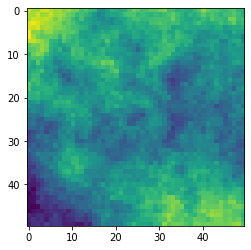

In [ ]:
normals = np.random.randn(np.prod(shape))
u = (A @ normals).reshape(shape)
plt.imshow(u)

Смоделируем еще несколько реализаций поля $U$:

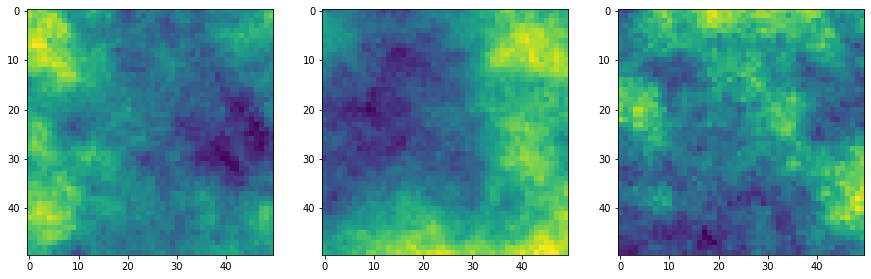

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(len(ax)):
    normals = np.random.randn(np.prod(shape))
    u = (A @ normals).reshape(shape)
    ax[i].imshow(u)

Смоделируем несколько реализаций поля $U$ для другого корреляционного масштаба:

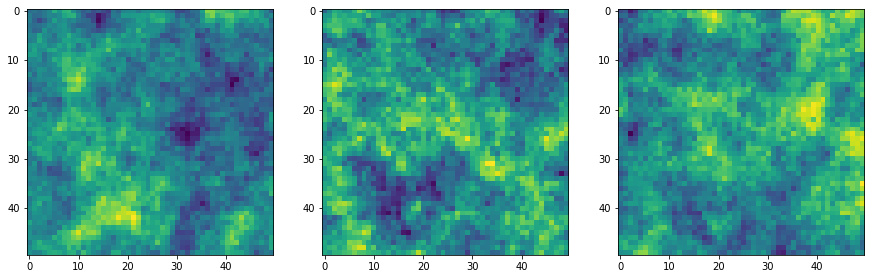

In [ ]:
B = K(D, 4)
A = np.linalg.cholesky(B)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(len(ax)):
    normals = np.random.randn(np.prod(shape))
    u = (A @ normals).reshape(shape)
    ax[i].imshow(u)

Чем меньше масштаб корреляции, тем в более близких точках значения поля становятся независимыми.

Немного модифицируем задачу. Пусть теперь значения поля U в некоторых точках будут заданы (например, мы провели прямые измерения) и хотим восстановить поле U в остальных точках.

Зададим массив точек, в которых значения U будут фиксированы

In [ ]:
given_points = 10*np.array([[i, j] for i in range(1, 5) for j in range(1, 5)])
given_points

array([[10, 10],
       [10, 20],
       [10, 30],
       [10, 40],
       [20, 10],
       [20, 20],
       [20, 30],
       [20, 40],
       [30, 10],
       [30, 20],
       [30, 30],
       [30, 40],
       [40, 10],
       [40, 20],
       [40, 30],
       [40, 40]])

Зададим значения поля U в этих точках:

In [ ]:
given_values = np.random.rand(len(given_points))*4 - 2
given_values

array([ 1.0083168 ,  0.60919972, -0.91984855, -1.64633941, -1.24867248,
       -0.90657282,  1.38915844, -0.29414061,  1.07716747, -1.44183095,
       -1.78904138, -1.52775476, -0.63382033, -0.45240052,  0.84332927,
        1.16046944])

Изобразим данные нам точки и значения на карте:

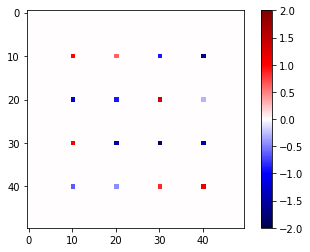

In [ ]:
u = np.zeros(shape)
u[given_points[:, 0], given_points[:, 1]] = given_values
plt.imshow(u, cmap='seismic', vmin=-2, vmax=2)
plt.colorbar()

Следующий шаг - смоделировать несколько реализаций поля U вокруг заданных точек и значений. Идея в том, что если поле U является гауссовским, т.е. совместное распределение значений поля $u_1, ..., u_n$ в точках $x_1, ..., x_n$ -- гауссовское:
$$p(u_1, ..., u_n) = N(0, \Sigma),$$
то условные распределения тоже будут гауссовскими:
$$p(u_1, ..., u_k | u_{k+1}, ...,  u_n) = N(\mu, \tilde\Sigma).$$
Можно выписать конкретную формулу:

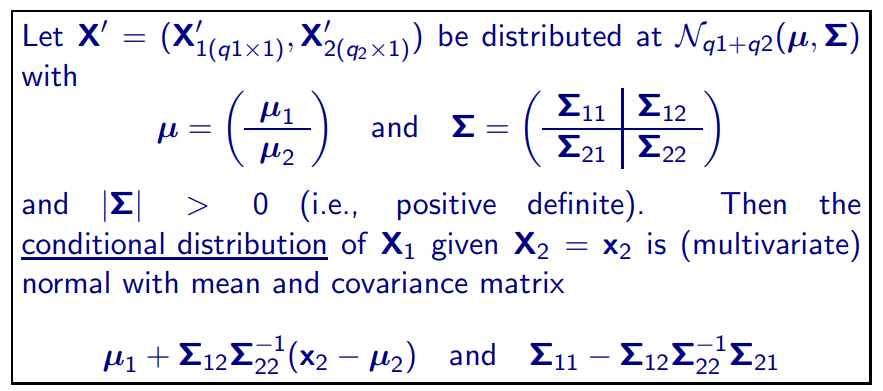

**Домашнее задание 2**: докажите эту формулу.

Код ниже реализует вычисления по формуле условного распределения и сэмплирует 3 случайные реализации из условного распределения:

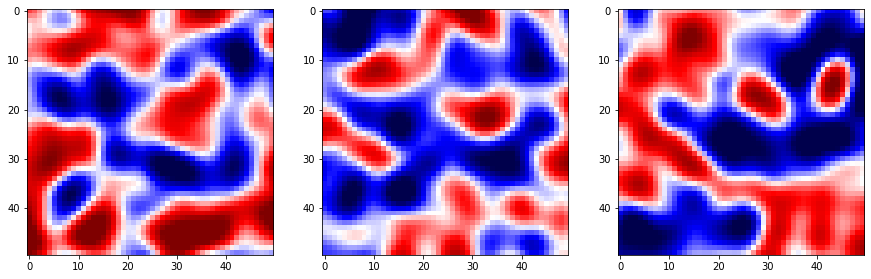

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

gp = GaussianProcessRegressor(RBF(4, length_scale_bounds='fixed'))
gp.fit(given_points, given_values)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
predicted = gp.sample_y(points, n_samples=len(ax))
for i in range(len(ax)):
    ax[i].imshow(predicted[..., i].reshape(shape), vmin=-2, vmax=2, cmap='seismic')

Обратите внимание, что на всех картинках значения в точках given_points совпадает с теми значениями given_values, которые мы сами задали. Это можно проверить и непосредственно, например, возьмем значения в точках given_points из самой левой картинки:

In [ ]:
predicted[..., 0].reshape(shape)[given_points[:, 0], given_points[:, 1]]

array([ 1.00832402,  0.6092056 , -0.9198464 , -1.64633054, -1.24869005,
       -0.90657906,  1.38916192, -0.29413849,  1.07716323, -1.44182863,
       -1.78904645, -1.52775893, -0.63382199, -0.45241536,  0.84332708,
        1.16047872])

и увидим, что они совпадают (ну почти, небольшая разница объясняется деталями реализации рауссовской регрессии) с исходными given_values:

In [ ]:
given_values

array([ 1.0083168 ,  0.60919972, -0.91984855, -1.64633941, -1.24867248,
       -0.90657282,  1.38915844, -0.29414061,  1.07716747, -1.44183095,
       -1.78904138, -1.52775476, -0.63382033, -0.45240052,  0.84332927,
        1.16046944])

Если рассматривать не случайные реализации U, а среднее по большому числу реализаций, то результат регрессии будет как на картинке ниже:

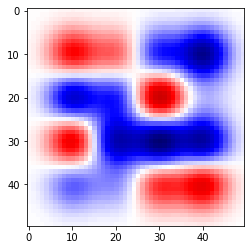

In [ ]:
mean = gp.predict(points).reshape(shape)
plt.imshow(mean, vmin=-2, vmax=2, cmap='seismic')

Упражнение: проверьте, как параметр масштаба (первый параметр) ядра RBF(4, length_scale_bounds='fixed') влияет на результат регрессии.